In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
# import seaborn as sns; sns.set(style="ticks")

import sklearn
import sklearn.ensemble


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
plt.rcParams['savefig.dpi'] = 80*2
plt.rcParams['figure.dpi'] = 80*2
plt.rcParams['figure.figsize'] = np.array((10,6))
plt.rcParams['figure.facecolor'] = "white"

# Read in Data
See `get catalogs.ipynb`

In [4]:
data_dir = "data"

In [5]:
features = pd.read_csv(os.path.join(data_dir, "features.csv"))
features = features.set_index("SpecObjID")
features = features[["modelMag_g", "modelMag_r", "modelMag_i"]]
print(features.shape)
features.head()

(129702, 3)


,modelMag_g,modelMag_r,modelMag_i
SpecObjID,,,
75094093037830144,17.61871,16.96226,16.56983
75094093138493440,17.05057,16.26454,15.79881
75094093180436480,16.20129,15.53550,15.08500
75094093243351040,17.86717,17.17922,16.72164
75094093398540288,18.33195,17.63743,17.23082


In [6]:
targets = pd.read_csv(os.path.join(data_dir, "targets.csv"))
targets = targets.set_index("SpecObjID")
print(targets.shape)
targets.head()

(129702, 1)


,OH_median
SpecObjID,
75094093037830144,9.052521
75094093138493440,9.136789
75094093180436480,9.050070
75094093243351040,9.131351
75094093398540288,8.706560


# Create training and testing set

In [7]:
import split_sets

In [8]:
index_sets = split_sets.split_indices(targets.index.values)
training_set, validation_set, testing_set = index_sets

In [9]:
training_set

array([504354755443687424, 385848739601842176, 629327844501094400, ...,
       620037963555799040, 665356282600882176, 680837538688008192])

In [10]:
rf = sklearn.ensemble.RandomForestRegressor(
    n_estimators=100,
    n_jobs=6,
)

In [11]:
rf.fit(features.loc[training_set].values, 
       targets.loc[training_set].values.reshape(-1, ))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=6,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [12]:
predicted = rf.predict(features.loc[validation_set])

Text(0, 0.5, 'Predicted')

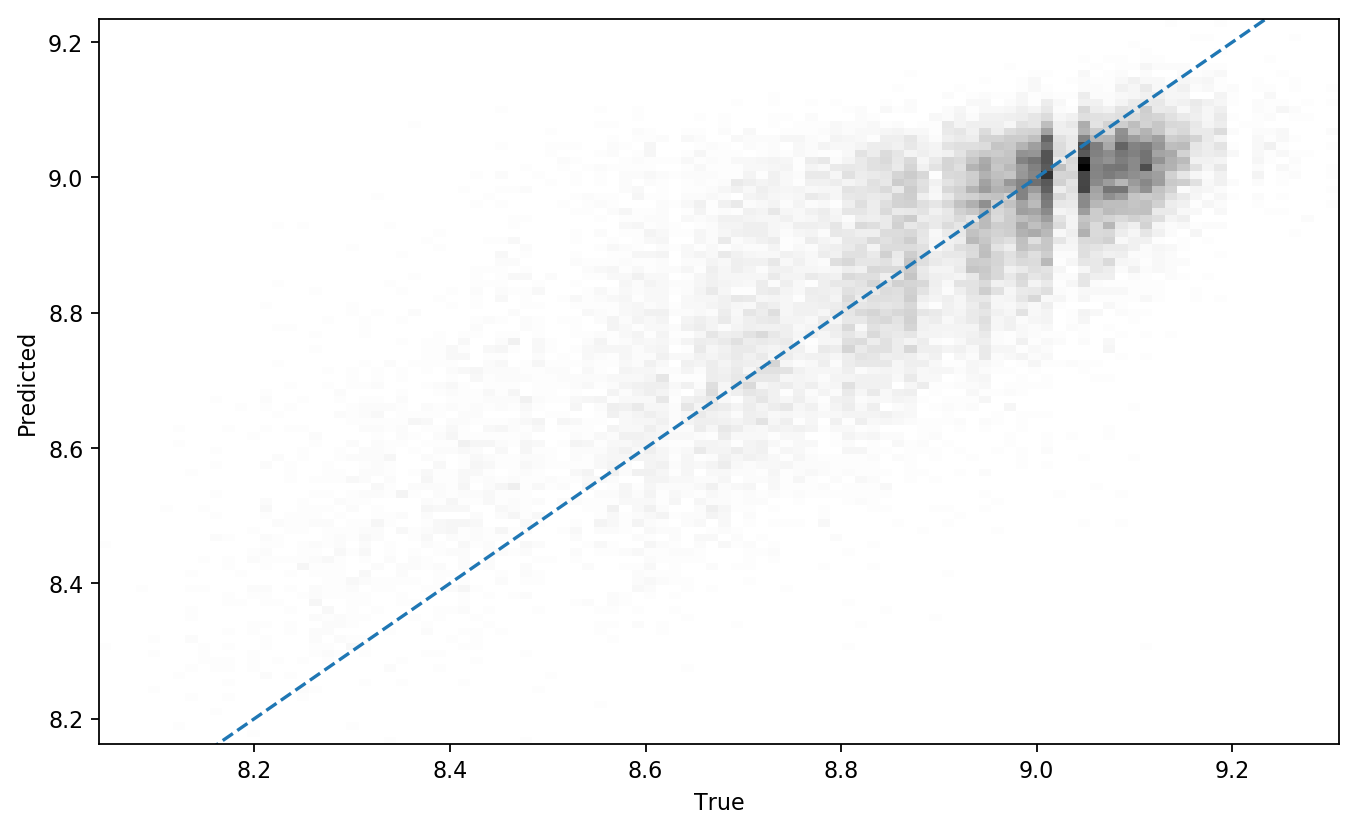

In [13]:
plt.hist2d(targets.loc[validation_set].values.flatten(), 
           predicted, 
           bins=100,
           cmap=plt.get_cmap("gray_r"))

# plt.axis("square")
plt.plot([8, 9.5], [8, 9.5], linestyle= "dashed")

plt.xlabel("True")
plt.ylabel("Predicted")

In [14]:
error = predicted - targets.loc[validation_set].values.flatten()
(error**2).mean()**.5

0.1310133085962613

# Results
Okay, this is a start. 
 - We're getting about .119 dex error using a basic RF implementation (and .131 when I only use $gri$ bands). 
 - Wu and Boada misquote [Acquaviva](https://academic.oup.com/mnras/article/456/2/1618/1063020), saying they get 0.081 and 0.093 for $0.09 < z < 0.12$ and $0.2 < z < 0.25$ subsamples, respectively. The details seem a little off, but whatever.
 - Wu and Boada say their 3-band RF has an RMSE of 0.130, which matches what I get here.